## Feature Engineering

In [2]:
import pandas as pd
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'

df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_GID), skiprows=0)

Buscamos las intancias con NaN's o con campos que se contradicen.


Primero buscamos las personas que indican no tener trabajo pero marca tener horas de trabajo registradas mayores de 0.

In [5]:
df.isna().any()

anios_estudiados                              False
barrio                                         True
categoria_de_trabajo                           True
edad                                          False
educacion_alcanzada                           False
estado_marital                                False
ganancia_perdida_declarada_bolsa_argentina    False
genero                                        False
horas_trabajo_registradas                     False
religion                                      False
rol_familiar_registrado                       False
tiene_alto_valor_adquisitivo                  False
trabajo                                        True
dtype: bool

In [2]:
df_gente_sin_trabajo_con_horas_registradas = df[(df['categoria_de_trabajo'] == 'sin_trabajo') & (df['horas_trabajo_registradas'] > 0)]
df_gente_sin_trabajo_con_horas_registradas

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
5361,10,Palermo,sin_trabajo,18,1_anio,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,0,NaN
10845,8,Palermo,sin_trabajo,23,7-8_grado,divorciado,0,hombre,35,cristianismo,sin_familia,0,NaN
14772,10,Palermo,sin_trabajo,17,1_anio,sin_matrimonio,0,hombre,30,cristianismo,con_hijos,0,NaN
20337,11,Palermo,sin_trabajo,18,2_anio,sin_matrimonio,0,mujer,10,cristianismo,con_hijos,0,NaN
23232,14,Palermo,sin_trabajo,20,5_anio,sin_matrimonio,0,hombre,40,judaismo,con_hijos,0,NaN
32304,13,Palermo,sin_trabajo,30,4_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,NaN
32314,14,Palermo,sin_trabajo,18,5_anio,sin_matrimonio,0,hombre,4,cristianismo,con_hijos,0,NaN


Estas 7 instancia tiene horas de trabajo registradas apesar de que indicaron que estan sin trabajo. Elejimos descartarlas por ser contradictorias y no estimar su tipo de trabajo mediante alguna indicador estadistico.

In [3]:
df.drop(df_gente_sin_trabajo_con_horas_registradas.index, inplace = True)


Los siguientes son las instancias con mas datos no ingresados del dataframe y devido a que son muy poco decidimos eliminarlos antes que estimar sus datos invalidos.

In [4]:
import numpy as np
def tiene_n_missings(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n <= acum


lista_de_missings = [tiene_n_missings(x, 3) for x in df.isna().to_numpy()]

df_3_missings = df.reset_index()[lista_de_missings].set_index('index')
df_3_missings.isnull().sum()

anios_estudiados                               0
barrio                                        27
categoria_de_trabajo                          27
edad                                           0
educacion_alcanzada                            0
estado_marital                                 0
ganancia_perdida_declarada_bolsa_argentina     0
genero                                         0
horas_trabajo_registradas                      0
religion                                       0
rol_familiar_registrado                        0
tiene_alto_valor_adquisitivo                   0
trabajo                                       27
dtype: int64

In [5]:
def f(x,y,z):
  return not x and not y and not z

  
df_tiene_3_missing = df[['barrio', 'categoria_de_trabajo','tiene_alto_valor_adquisitivo','trabajo']].copy()
lista = df[['barrio', 'categoria_de_trabajo','trabajo']].notnull().values.tolist()
df_tiene_3_missing['tiene_tres_missing'] = ['Con missing' if f(x[0],x[1],x[2]) else 'Sin missing' for x in lista]
df_tiene_3_missing.value_counts('tiene_tres_missing')

tiene_tres_missing
Sin missing    32527
Con missing       27
dtype: int64

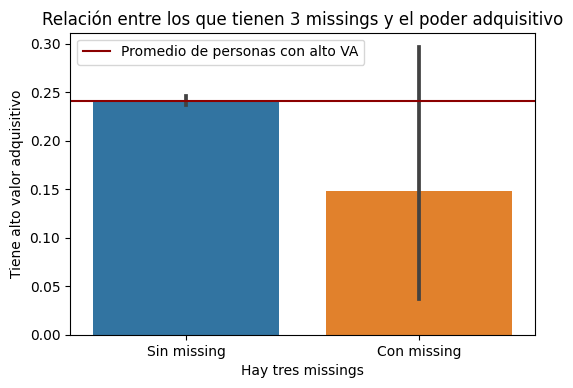

In [6]:
#Real devs dont use for
from functools import reduce
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_3_missing,
    x='tiene_tres_missing',
    y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Hay tres missings")
plt.title('Relación entre los que tienen 3 missings y el poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()


Como podemos ver el grupo que presenta 3 missing (en las categorias de barrio, categoria de trabajo y trabajo) no presenta informacion significativa que nos permita determinar el alto valor adquisitivo devido a su gran varianza. Es por ello que decidimos eliminarlos...

In [7]:
df.drop(df_3_missings.index, inplace = True)
df

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,universidad_2_anio,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,4_anio,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,4_anio,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento


Vemos que los missings de trabajo se corresponden con los de categoria de trabajo

In [8]:
df.isnull().sum()

anios_estudiados                                 0
barrio                                         556
categoria_de_trabajo                          1809
edad                                             0
educacion_alcanzada                              0
estado_marital                                   0
ganancia_perdida_declarada_bolsa_argentina       0
genero                                           0
horas_trabajo_registradas                        0
religion                                         0
rol_familiar_registrado                          0
tiene_alto_valor_adquisitivo                     0
trabajo                                       1809
dtype: int64

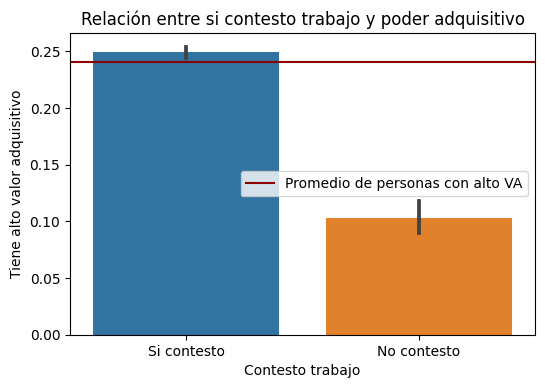

In [9]:
df_con_trabajo = df[['categoria_de_trabajo','tiene_alto_valor_adquisitivo','trabajo']].copy()
lista = df[['categoria_de_trabajo','trabajo']].notnull().values.tolist()
df_con_trabajo['contesto_trabajo'] = ['No contesto' if not x[0] and not x[1] else 'Si contesto' for x in lista]

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_con_trabajo,
    x='contesto_trabajo',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Contesto trabajo")
plt.title('Relación entre si contesto trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Como podemos ver con el grafico todos las persona que no contestaron tiene una tendencia a poseer menor poder adquisitivo. De modo que genera un impacto en nuetros datos, lo mas conveniente es crear una nueva categoria (No contesto) y englobar todas estar persona en este nuevo campo.

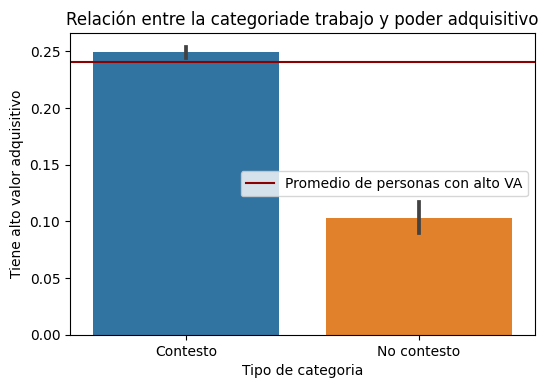

In [10]:
df_tiene_categoria_de_trabajo = df[['categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_tiene_categoria_de_trabajo['categoria_de_trabajo'] = df['categoria_de_trabajo'].notnull().apply(lambda x: 'Contesto' if x else 'No contesto')

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_categoria_de_trabajo,
    x='categoria_de_trabajo',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de categoria")
plt.title('Relación entre la categoriade trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

In [11]:
df = df.replace({'trabajo': np.nan, 'categoria_de_trabajo': np.nan},'No contesto')
df['trabajo'].isna().any() 

False

Tambien podemos notar que eduacion alzancada y anios estudidados nos aportan la misma informacion.(Luego ponder el mapeo)

In [12]:
df = df.drop(['educacion_alcanzada'],axis=1)

Nos fijamos si siguen habiendo missings

In [13]:
df.isnull().sum()

anios_estudiados                                0
barrio                                        556
categoria_de_trabajo                            0
edad                                            0
estado_marital                                  0
ganancia_perdida_declarada_bolsa_argentina      0
genero                                          0
horas_trabajo_registradas                       0
religion                                        0
rol_familiar_registrado                         0
tiene_alto_valor_adquisitivo                    0
trabajo                                         0
dtype: int64

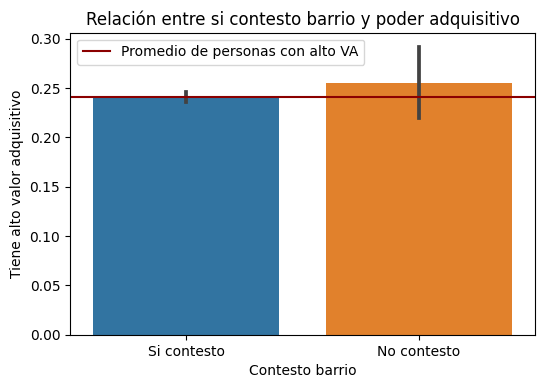

In [14]:
df_con_barrio = df[['barrio','tiene_alto_valor_adquisitivo']].copy()
lista = df['barrio'].notnull().values.tolist()
df_con_barrio['contesto_barrio'] = ['No contesto' if not x else 'Si contesto' for x in lista]

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_con_barrio,
    x='contesto_barrio',
    y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Contesto barrio")
plt.title('Relación entre si contesto barrio y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Como se puede observar son similares, es por ello que se decide remplazar por la media en este caso

In [15]:
df = df.replace({'barrio': np.nan},'Palermo')

In [16]:
df.isnull().sum()

anios_estudiados                              0
barrio                                        0
categoria_de_trabajo                          0
edad                                          0
estado_marital                                0
ganancia_perdida_declarada_bolsa_argentina    0
genero                                        0
horas_trabajo_registradas                     0
religion                                      0
rol_familiar_registrado                       0
tiene_alto_valor_adquisitivo                  0
trabajo                                       0
dtype: int64

In [17]:
mapa = {'Palermo' : 'C14','Belgrano' : 'C13','San Isidro' : 'San Isidro','Villa Urquiza' : 'C12','Recoleta' : 'C2','La Boca' : 'C4','Agronomia' : 'C15','Almagro' : 'C5','Balvanera' : 'C3','Puerto Madero' : 'C1','Caballito' : 'C6','Boedo' : 'C5','Barracas' : 'C4','Chacarita' : 'C15','Coghland' : 'C12','Floresta' : 'C10','Constitucion' : 'C1','Colegiales' : 'C13','Flores' : 'C7','Liniers' : 'C9','Monte Castro' : 'C10','Mataderos' : 'C9','Nueva Pompeya' : 'C4','Monserrat' : 'C1','nuñez' : 'C13','Parque Chacabuco' : 'C7','Parque Avellaneda' : 'C9','Villa Luro' : 'C10','Parque Chas' : 'C15','La Paternal' : 'C15','Retiro' : 'C1','Villa Devoto' : 'C11','Villa Soldati' : 'C8','San Telmo' : 'C1','Villa Real' : 'C10','Santa Rita' : 'C11','Villa General Mitre' : 'C11','Versalles' : 'C10','Velez Sarsfield' : 'C10','Villa Pueyrredon' : 'C12','Cilla Riachuelo' : 'C8'}
df['comuna'] = df['barrio'].apply(lambda x: mapa.get(x))

### Porque?

In [18]:
df['estado_marital'] = df['estado_marital'].apply(lambda x: 'matrimonio' if x == 'matrimonio_civil' or x == 'matrimonio_militar' else x)

In [19]:
df['rol_familiar_registrado'] = df['rol_familiar_registrado'].apply(lambda x: 'casado' if x == 'casada' else x)